- pip install jupyter
- pip install numpy
- pip install matplotlib



In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

![my picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)
- apple_width ≈ 6cm
- apple_length ≈ 6cm
- banana_width ≈ 4cm
- banana_length ≈ 8cm

- apple = 0
- banana = 1

In [142]:
def generate_dataset(n):
    apple_width = np.random.normal(6 ,1 ,n)
    apple_length = np.random.normal(6 ,1 ,n)
    banana_width = np.random.normal(4 ,1 ,n)
    banana_length = np.random.normal(8 ,1 ,n)
    
    width = np.concatenate((apple_width , banana_width))
    length = np.concatenate((apple_length , banana_length))
    x = np.array((width , length)).T
    
    y_apples = np.zeros(n , dtype='int')
    y_bananas = np.ones(n , dtype='int')
    y = np.concatenate((y_apples , y_bananas))
    
    return x , y


In [143]:
X_train , Y_train = generate_dataset(100)

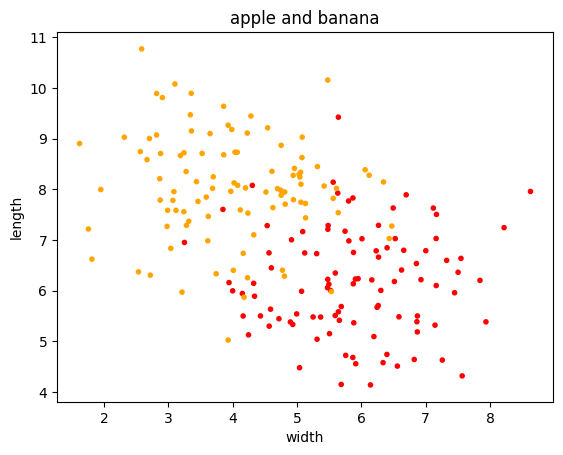

In [144]:
cmap = ["red" , "orange"]
plt.scatter(X_train[:,0] ,X_train[:,1] , c = Y_train ,cmap=ListedColormap(cmap) ,marker='.')

plt.title("apple and banana")
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [154]:
class KNN:
    def __init__(self , k):
        self.k = k
    
    #training
    def fit(self ,X ,Y):
        self.X_train = X
        self.Y_train = Y
        
    def euclidean_distance(self, x1 ,x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self , X):
        Y = []
        for x in X:
            distances = []
            for x_train in X_train:
                d = self.euclidean_distance(x ,x_train)
                distances.append(d)   # distances = [1.21165165 , 3.24298468 , 2.268298424 , 1.284642426 , 0.28249498 , ...]
            
            clean_distances = [p.item() for p in distances]
            nearest_neighbors = np.argsort(clean_distances)[0:self.k] # if k=3 --> nearest_neighbors = (121 , 34 , 12)andis array
            
            result = np.bincount(Y_train[nearest_neighbors]) # result =(2,1) --> zero andis = 2   , one andis = 1
            y = np.argmax(result) # 2 > 1 --> we have 2 andis of zero --> y = 0
            Y.append(y)
        return Y
    
    def evaluate(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.sum(Y_pred == Y)/len(Y)
        return float(accuracy)
        
        
        

In [155]:
knn = KNN(k = 5)
knn.fit(X_train,Y_train)

In [156]:
new_fruit = np.array([3, 8.4])
new_fruit_2 = np.array([6, 6])
new_fruit_3 = np.array([4, 7])
new_fruits = (new_fruit,new_fruit_2,new_fruit_3)
outputs = knn.predict(new_fruits)

In [157]:
for output in outputs:
    if  output == 0:
        print("apple🍎")
    else:
        print("banana🍌")

banana🍌
apple🍎
banana🍌


In [158]:
X_test , Y_test = generate_dataset(90)

In [159]:
knn.evaluate(X_test , Y_test)


0.9277777777777778